In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import sys
import argparse
import h5py
from scipy.stats import t as student_t
from statsmodels.stats import multitest as mt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# IDP_df = pd.read_pickle('male_IDP_prototype.pkl')
# vars_df = pd.read_pickle('male_vars_prototype.pkl')

# IDP_df = pd.read_pickle('female_IDP_ensemble_vars_select_testset.pkl')
vars_df = pd.read_pickle('female_vars_ensembles_testset.pkl')

# IDP_names = np.loadtxt("IDP_names.txt", dtype=str, delimiter='\n')
# IDP_categories = np.loadtxt("IDP_categories.txt", dtype=str, delimiter='\n')


with open('IDP_names.txt') as f:
    IDP_names = f.readlines()
    IDP_names = [l.strip('\n\r') for l in IDP_names]
    IDP_names = np.array(IDP_names)
# vars_categories = np.loadtxt("vars_categories.txt", dtype=str, delimiter='\n')
with open('IDP_categories.txt') as f:
    IDP_categories = f.readlines()
    IDP_categories = [l.strip('\n\r') for l in IDP_categories]
    IDP_categories = np.array(IDP_categories)


with open('varsHeader.txt') as f:
    varsHeader = f.readlines()
    varsHeader = [l.strip('\n\r') for l in varsHeader]
    varsHeader = np.array(varsHeader)
# vars_categories = np.loadtxt("vars_categories.txt", dtype=str, delimiter='\n')
with open('vars_categories.txt') as f:
    vars_categories = f.readlines()
    vars_categories = [l.strip('\n\r') for l in vars_categories]
    vars_categories = np.array(vars_categories)

In [3]:
vars_df.head()

,modality,bonf,fdr,dataframe
0,NaiveFull,5.509606,3.300325,idx ...
1,LinearRegressionFull,5.509606,3.500416,idx ...
2,ElasticNetFull,5.509606,3.468050,idx ...
3,Cluster1,5.509606,3.476424,idx ...
4,Cluster2,5.509606,3.506630,idx ...


In [4]:
vars_df.iloc[0].dataframe.head()

,idx,names,Categories,pearson_r,t_test_statistic,p_values_corrected,p_values,abs_pearson_r,log_p_values,log_p_values_corrected
0,0,Ethnic background (0.0),Ethnic Background,-0.014876,0.744494,1.000000,0.456647,0.014876,0.340419,4.821637e-17
1,1,Ethnic background (1.0),Ethnic Background,-0.028788,0.595809,1.000000,0.551618,0.028788,0.258362,4.821637e-17
2,2,Ethnic background (2.0),Ethnic Background,-0.043779,1.176664,0.972427,0.239718,0.043779,0.620300,1.214292e-02
3,3,Genotype measurement batch (0.0),Genetic Markers,-0.059825,2.966517,0.163519,0.003041,0.059825,2.516975,7.864327e-01
4,4,Heterozygosity (0.0),Genetic Markers,-0.009512,0.470858,1.000000,0.637784,0.009512,0.195326,4.821637e-17


In [5]:
vars_df

,modality,bonf,fdr,dataframe
0,NaiveFull,5.509606,3.300325,idx ...
1,LinearRegressionFull,5.509606,3.500416,idx ...
2,ElasticNetFull,5.509606,3.468050,idx ...
3,Cluster1,5.509606,3.476424,idx ...
4,Cluster2,5.509606,3.506630,idx ...
5,Cluster3,5.509606,3.327015,idx ...
6,Cluster4,5.509606,3.698217,idx ...
7,Cluster5,5.509606,3.631729,idx ...
8,Cluster6,5.509606,3.424072,idx ...
9,Cluster7,5.509606,3.276632,idx ...


In [6]:
vars_df.iloc[9].dataframe.sort_values('log_p_values', ascending=False)

,idx,names,Categories,pearson_r,t_test_statistic,p_values_corrected,p_values,abs_pearson_r,log_p_values,log_p_values_corrected
2935,3422,Total BMD (bone mineral density) T-score (2.0),Skeletal Measurements,-3.926306e-01,2.017815e+01,4.192940e-79,2.593839e-83,3.926306e-01,8.258606e+01,78.377481
2934,3420,Total BMD (bone mineral density) (2.0),Skeletal Measurements,-3.903404e-01,2.003922e+01,2.245555e-78,2.778292e-82,3.903404e-01,8.155622e+01,77.648676
2927,3406,Head BMD (bone mineral density) (2.0),Skeletal Measurements,-3.786634e-01,1.933759e+01,1.997358e-73,3.706820e-77,3.786634e-01,7.643100e+01,72.699544
2952,3456,Head BMC (bone mineral content) (2.0),Skeletal Measurements,-3.571532e-01,1.800807e+01,3.612999e-64,8.940301e-68,3.571532e-01,6.704865e+01,63.442132
2926,3404,Arms BMD (bone mineral density) (2.0),Skeletal Measurements,-3.377594e-01,1.696103e+01,2.790798e-57,8.632225e-61,3.377594e-01,6.006388e+01,56.554272
...,...,...,...,...,...,...,...,...,...,...
7789,8997,Treatment/medication code (1141168322 - plavix...,Medical History,4.503649e-18,2.255874e-16,1.000000e+00,1.000000e+00,4.503649e-18,9.643275e-17,-0.000000
7751,8959,Treatment/medication code (1141157254 - isosor...,Medical History,-7.638034e-18,3.825885e-16,1.000000e+00,1.000000e+00,7.638034e-18,9.643275e-17,-0.000000
13900,15231,Diagnoses - ICD10 (N422 - N42.2 Atrophy of pro...,Medical History,-6.278096e-18,3.144693e-16,1.000000e+00,1.000000e+00,6.278096e-18,9.643275e-17,-0.000000
14634,15965,Diagnoses - ICD10 (Z862 - Z86.2 Personal histo...,Medical History,4.985689e-18,2.497328e-16,1.000000e+00,1.000000e+00,4.985689e-18,9.643275e-17,-0.000000


In [7]:
vars_over_bThr_list = []

for idx in range(len(vars_df)):
    df = vars_df.iloc[idx].dataframe
    bThr = vars_df.iloc[idx].bonf
    vars_over_bThr = df[df.log_p_values>=bThr].sort_values('log_p_values', ascending=False).names.to_list()
    for var in vars_over_bThr:
        vars_over_bThr_list.append(var)

In [8]:
print("Number of unique vars across all modalities: ", len(set(vars_over_bThr_list)))

Number of unique vars across all modalities:  126


In [9]:
unique_vars_over_bTHr = list(set(vars_over_bThr_list))

In [10]:
unique_vars_over_bThr_categories = []

for var in unique_vars_over_bTHr:
    idx = list(varsHeader).index(var)
    category = vars_categories[idx]
    unique_vars_over_bThr_categories.append(category)

In [11]:
sorted(unique_vars_over_bTHr)

['Alcohol intake frequency. (0.0)',
 'Alcohol intake frequency. (2.0)',
 'Android total mass (2.0)',
 'Arm BMD (bone mineral density) (left) (2.0)',
 'Arm BMD (bone mineral density) (right) (2.0)',
 'Arm fat mass (right) (2.0)',
 'Arm fat percentage (left) (2.0)',
 'Arm fat percentage (right) (2.0)',
 'Arm total mass (right) (2.0)',
 'Arms BMC (bone mineral content) (2.0)',
 'Arms BMD (bone mineral density) (2.0)',
 'Arms total mass (2.0)',
 'Body fat percentage (0.0)',
 'Body fat percentage (2.0)',
 'Body mass index (BMI) (2.0)',
 'Body surface area (2.0)',
 'C-reactive protein (0.0)',
 'Diabetes diagnosed by doctor (0.0)',
 'Diagnoses - ICD10 (E109 - E10.9 Without complications)',
 'Diagnoses - ICD10 (E230 - E23.0 Hypopituitarism)',
 'Diagnoses - ICD10 (E274 - E27.4 Other and unspecified adrenocortical insufficiency)',
 "Diagnoses - ICD10 (F009 - F00.9 Dementia in Alzheimer's disease, unspecified)",
 'Diagnoses - ICD10 (I10 - I10 Essential (primary) hypertension)',
 'Diagnoses - ICD1

In [12]:
modalities = []
pearson_rs_list = []
for var in unique_vars_over_bTHr:
    modalities_with_var = []
    pearsonRs_with_var = []
    for idx in range(len(vars_df)):
        df = vars_df.iloc[idx].dataframe
        modality = vars_df.iloc[idx].modality
        bThr = vars_df.iloc[idx].bonf
        df = df[df.log_p_values>=bThr].sort_values('log_p_values', ascending=False)
        vars_over_bThr = df.names.to_list()
        pearson_r_over_bThr = df.pearson_r.to_list()
        if var in vars_over_bThr:
            modalities_with_var.append(modality)
            pearsonRs_with_var.append(pearson_r_over_bThr[vars_over_bThr.index(var)])
    modalities.append(modalities_with_var)
    pearson_rs_list.append(pearsonRs_with_var)

In [13]:
len(modalities)

126

In [14]:
df_vars_over_bThr = pd.DataFrame.from_dict({
    'names': unique_vars_over_bTHr,
    'Categories': unique_vars_over_bThr_categories,
    'modalities': modalities,
    'pearson_r': pearson_rs_list
})

In [15]:
df_vars_over_bThr.head()

,names,Categories,modalities,pearson_r
0,Frequency of drinking alcohol (0.0),Alcohol,"[NaiveFull, Cluster1, Cluster2, Cluster3, Clus...","[0.13512577747461435, 0.12914189713838803, 0.1..."
1,Whole body fat mass (2.0),Physical Measurements,"[NaiveFull, Cluster2, Cluster3, Cluster6, Clus...","[-0.12878539825241975, -0.11407167524114892, -..."
2,Leg fat-free mass (right) (2.0),Physical Measurements,"[NaiveFull, Cluster7]","[-0.09521492839048198, -0.09517961575179965]"
3,Heel broadband ultrasound attenuation (right) ...,Skeletal Measurements,"[NaiveFull, Cluster1, Cluster2, Cluster3, Clus...","[-0.20911817561869314, -0.13407231925999152, -..."
4,L1-L4 BMC (bone mineral content) (2.0),Skeletal Measurements,"[NaiveFull, Cluster1, Cluster3, Cluster6, Clus...","[-0.20905210805274846, -0.10711405160805686, -..."


In [16]:
set(df_vars_over_bThr.Categories.to_list())

{'Alcohol',
 'Blood Assays',
 'Cardiac & Circulartory Measurements',
 'Medical History',
 'Physical Measurements',
 'Skeletal Measurements'}

In [17]:
for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        print('Var: {}'.format(name))
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        print('   Modalities:')
        for i, mod in enumerate(mods[0]):
            print('   -> {} ({:.3f})'.format(mod, prs[0][i]))
        
    print('\n')

Category: Alcohol
------------------------------------------------
Var: Alcohol intake frequency. (0.0)
   Modalities:
   -> Cluster2 (0.093)
   -> Cluster8 (0.094)
   -> Cluster9 (0.093)
Var: Alcohol intake frequency. (2.0)
   Modalities:
   -> Cluster3 (0.096)
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
   -> Cluster9 (0.117)
Var: Frequency of drinking alcohol (0.0)
   Modalities:
   -> NaiveFull (0.135)
   -> Cluster1 (0.129)
   -> Cluster2 (0.112)
   -> Cluster3 (0.135)
   -> Cluster7 (0.118)
   -> Cluster8 (0.125)
   -> Cluster9 (0.134)
   -> MLP (0.115)


Category: Blood Assays
------------------------------------------------
Var: C-reactive protein (0.0)
   Modalities:
   -> Cluster7 (-0.111)


Category: Cardiac & Circulartory Measurements
------------------------------------------------
Var: Systolic blood pressure, automated reading (0.0)
   Modalities:
   -> Cluster2 (0.098)
   -> Cluster3 (0.099)


Category: Medical History
-----------------

In [18]:
sorted(prs[0], reverse=True)

[-0.1036545989272403]

In [19]:
for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        print('Var: {}'.format(name))
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        print('   Modalities:')
        
        prs_abs = np.abs(prs).tolist()
        _, mods = zip(*sorted(zip(prs_abs[0], mods[0]), reverse=True))
        _, prs = zip(*sorted(zip(prs_abs[0], prs[0]), reverse=True))
        
        for i, mod in enumerate(mods):
            print('   -> {} ({:.3f})'.format(mod, prs[i]))
        
    print('\n')

Category: Alcohol
------------------------------------------------
Var: Alcohol intake frequency. (0.0)
   Modalities:
   -> Cluster8 (0.094)
   -> Cluster2 (0.093)
   -> Cluster9 (0.093)
Var: Alcohol intake frequency. (2.0)
   Modalities:
   -> Cluster3 (0.096)
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
   -> Cluster9 (0.117)
Var: Frequency of drinking alcohol (0.0)
   Modalities:
   -> Cluster3 (0.135)
   -> NaiveFull (0.135)
   -> Cluster9 (0.134)
   -> Cluster1 (0.129)
   -> Cluster8 (0.125)
   -> Cluster7 (0.118)
   -> MLP (0.115)
   -> Cluster2 (0.112)


Category: Blood Assays
------------------------------------------------
Var: C-reactive protein (0.0)
   Modalities:
   -> Cluster7 (-0.111)


Category: Cardiac & Circulartory Measurements
------------------------------------------------
Var: Systolic blood pressure, automated reading (0.0)
   Modalities:
   -> Cluster3 (0.099)
   -> Cluster2 (0.098)


Category: Medical History
-----------------

   Modalities:
   -> Cluster7 (-0.282)
   -> NaiveFull (-0.255)
   -> Cluster6 (-0.224)
   -> Cluster3 (-0.158)
   -> Cluster9 (-0.157)
   -> Cluster1 (-0.145)
   -> Cluster8 (-0.142)
   -> Cluster10 (-0.139)
   -> Cluster11 (-0.138)
   -> Cluster5 (-0.137)
   -> RENT (-0.136)
   -> ElasticNetFull (-0.134)
   -> MLP (-0.133)
   -> LinearRegressionFull (-0.131)
   -> Cluster2 (-0.127)
   -> Cluster4 (-0.123)
Var: Femur total BMD (bone mineral density) T-score (right) (2.0)
   Modalities:
   -> Cluster7 (-0.283)
   -> NaiveFull (-0.257)
   -> Cluster6 (-0.224)
   -> Cluster3 (-0.164)
   -> Cluster9 (-0.164)
   -> Cluster1 (-0.149)
   -> Cluster8 (-0.147)
   -> Cluster10 (-0.141)
   -> Cluster11 (-0.140)
   -> RENT (-0.139)
   -> Cluster5 (-0.138)
   -> MLP (-0.138)
   -> ElasticNetFull (-0.137)
   -> LinearRegressionFull (-0.134)
   -> Cluster2 (-0.132)
   -> Cluster4 (-0.127)
Var: Femur troch BMD (bone mineral density) (left) (2.0)
   Modalities:
   -> Cluster7 (-0.251)
   -> NaiveFull 

In [20]:
variance_threshold = 0.1

for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        
        
        prs_abs = np.abs(prs).tolist()
        _, mods = zip(*sorted(zip(prs_abs[0], mods[0]), reverse=True))
        _, prs = zip(*sorted(zip(prs_abs[0], prs[0]), reverse=True))
        
        if prs[0] >= variance_threshold:
            print('Var: {}'.format(name))
            print('   Modalities:')
            for i, mod in enumerate(mods):
                if prs[i] >= variance_threshold:
                    print('   -> {} ({:.3f})'.format(mod, prs[i]))
        
    print('\n')

Category: Alcohol
------------------------------------------------
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
   -> Cluster9 (0.117)
Var: Frequency of drinking alcohol (0.0)
   Modalities:
   -> Cluster3 (0.135)
   -> NaiveFull (0.135)
   -> Cluster9 (0.134)
   -> Cluster1 (0.129)
   -> Cluster8 (0.125)
   -> Cluster7 (0.118)
   -> MLP (0.115)
   -> Cluster2 (0.112)


Category: Blood Assays
------------------------------------------------


Category: Cardiac & Circulartory Measurements
------------------------------------------------


Category: Medical History
------------------------------------------------
Var: Diabetes diagnosed by doctor (0.0)
   Modalities:
   -> Cluster5 (0.105)
   -> Cluster1 (0.104)
   -> RENT (0.101)
Var: Diagnoses - ICD10 (F009 - F00.9 Dementia in Alzheimer's disease, unspecified)
   Modalities:
   -> Cluster8 (0.105)
   -> Cluster9 (0.100)
Var: Diagnoses - secondary ICD10 (E109 - E10.9 Without complications)
   Modalities:

In [21]:
mods

('Cluster7',)

In [22]:
counter = 0
for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()[0]
        if 'ElasticNetFull' in mods or 'ElasticNetFull' in mods or 'ElasticNetFull' in mods:
            print('Var: {}'.format(name))
            counter += 1
        else:
            pass
    print('\n')
    
print("There are {} vars independent from the conventional modalities".format(counter))

Category: Alcohol
------------------------------------------------


Category: Blood Assays
------------------------------------------------


Category: Cardiac & Circulartory Measurements
------------------------------------------------


Category: Medical History
------------------------------------------------
Var: Diabetes diagnosed by doctor (0.0)
Var: Diagnoses - ICD10 (E109 - E10.9 Without complications)
Var: Diagnoses - secondary ICD10 (E109 - E10.9 Without complications)
Var: Non-cancer illness code, self-reported (1134 - oesophageal disorder)


Category: Physical Measurements
------------------------------------------------


Category: Skeletal Measurements
------------------------------------------------
Var: Arm BMD (bone mineral density) (left) (2.0)
Var: Arm BMD (bone mineral density) (right) (2.0)
Var: Arms BMC (bone mineral content) (2.0)
Var: Arms BMD (bone mineral density) (2.0)
Var: Femur neck BMD (bone mineral density) (left) (2.0)
Var: Femur neck BMD (bone mineral 

In [23]:
# IDP_df0 = pd.read_pickle('male_IDP_testB.pkl')
vars_df0 = pd.read_pickle('female_vars_testB.pkl')

In [24]:
vars0_over_bThr_list = []

for idx in range(len(vars_df0)):
    df = vars_df0.iloc[idx].dataframe
    bThr = vars_df0.iloc[idx].bonf
    vars_over_bThr = df[df.log_p_values>=bThr].sort_values('log_p_values', ascending=False).names.to_list()
    for var in vars_over_bThr:
        vars0_over_bThr_list.append(var)

In [25]:
print("Number of unique vars across all modalities: ", len(set(vars0_over_bThr_list)))

Number of unique vars across all modalities:  149


In [26]:
unique_vars0_over_bTHr = list(set(vars0_over_bThr_list))
unique_vars0_over_bThr_categories = []

for var in unique_vars0_over_bTHr:
    idx = list(varsHeader).index(var)
    category = vars_categories[idx]
    unique_vars0_over_bThr_categories.append(category)
    
modalities0 = []
pearson_rs_list0 = []
for var in unique_vars0_over_bTHr:
    modalities_with_var = []
    pearsonRs_with_var = []
    for idx in range(len(vars_df0)):
        df = vars_df0.iloc[idx].dataframe
        modality = vars_df0.iloc[idx].modality
        bThr = vars_df0.iloc[idx].bonf
        df = df[df.log_p_values>=bThr].sort_values('log_p_values', ascending=False)
        vars_over_bThr = df.names.to_list()
        pearson_r_over_bThr = df.pearson_r.to_list()
        if var in vars_over_bThr:
            modalities_with_var.append(modality)
            pearsonRs_with_var.append(pearson_r_over_bThr[vars_over_bThr.index(var)])
    modalities0.append(modalities_with_var)
    pearson_rs_list0.append(pearsonRs_with_var)

In [27]:
df_vars0_over_bThr = pd.DataFrame.from_dict({
    'names': unique_vars0_over_bTHr,
    'Categories': unique_vars0_over_bThr_categories,
    'modalities': modalities0,
    'pearson_r': pearson_rs_list0
})

In [28]:
df_vars0_over_bThr[df_vars0_over_bThr.names=='Alcohol intake frequency. (2.0)']

,names,Categories,modalities,pearson_r
115,Alcohol intake frequency. (2.0),Alcohol,"[tbss_FA, tbss_OD]","[0.09392468672552293, 0.09438980773468608]"


In [29]:
for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        print('Var: {}'.format(name))
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        mods0 = df_vars0_over_bThr[(df_vars0_over_bThr.Categories == cat) & (df_vars0_over_bThr.names == name)].modalities.to_list()
        prs0 = df_vars0_over_bThr[(df_vars0_over_bThr.Categories == cat) & (df_vars0_over_bThr.names == name)].pearson_r.to_list()
        print('   Modalities:')
        
        prs_abs = np.abs(prs).tolist()
        _, mods = zip(*sorted(zip(prs_abs[0], mods[0]), reverse=True))
        _, prs = zip(*sorted(zip(prs_abs[0], prs[0]), reverse=True))
        
        for i, mod in enumerate(mods):
            print('   -> {} ({:.3f})'.format(mod, prs[i]))
        
        
        if len(mods0) == 0:
            print('======== ATTENTION! NEW VAR ! ==========')
        else:
            prs_abs0 = np.abs(prs0).tolist()
            _, mods0 = zip(*sorted(zip(prs_abs0[0], mods0[0]), reverse=True))
            _, prs0 = zip(*sorted(zip(prs_abs0[0], prs0[0]), reverse=True))
        

#         for i, mod in enumerate(mods0):
#             print('   -> {} ({:.3f})'.format(mod, prs0[i]))
            print('   -> {} ({:.3f})'.format(mods0[0], prs0[0]))
        
    print('\n')

Category: Alcohol
------------------------------------------------
Var: Alcohol intake frequency. (0.0)
   Modalities:
   -> Cluster8 (0.094)
   -> Cluster2 (0.093)
   -> Cluster9 (0.093)
   -> tbss_FA (0.100)
Var: Alcohol intake frequency. (2.0)
   Modalities:
   -> Cluster3 (0.096)
   -> tbss_OD (0.094)
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
   -> Cluster9 (0.117)
   -> tbss_MD (0.139)
Var: Frequency of drinking alcohol (0.0)
   Modalities:
   -> Cluster3 (0.135)
   -> NaiveFull (0.135)
   -> Cluster9 (0.134)
   -> Cluster1 (0.129)
   -> Cluster8 (0.125)
   -> Cluster7 (0.118)
   -> MLP (0.115)
   -> Cluster2 (0.112)
   -> tbss_MD (0.129)


Category: Blood Assays
------------------------------------------------
Var: C-reactive protein (0.0)
   Modalities:
   -> Cluster7 (-0.111)
   -> rsfmri_2 (-0.108)


Category: Cardiac & Circulartory Measurements
------------------------------------------------
Var: Systolic blood pressure, automated reading 

   Modalities:
   -> Cluster7 (-0.246)
   -> rsfmri_0 (-0.269)
Var: Heel quantitative ultrasound index (QUI), direct entry (right) (2.0)
   Modalities:
   -> Cluster7 (-0.242)
   -> NaiveFull (-0.216)
   -> Cluster6 (-0.185)
   -> Cluster9 (-0.145)
   -> Cluster3 (-0.142)
   -> Cluster8 (-0.137)
   -> Cluster1 (-0.136)
   -> Cluster2 (-0.125)
   -> MLP (-0.112)
   -> rsfmri_0 (-0.222)
Var: L1-L4 BMC (bone mineral content) (2.0)
   Modalities:
   -> Cluster7 (-0.255)
   -> NaiveFull (-0.209)
   -> Cluster6 (-0.179)
   -> Cluster9 (-0.115)
   -> Cluster3 (-0.113)
   -> Cluster1 (-0.107)
   -> Cluster8 (-0.101)
   -> rsfmri_2 (-0.233)
Var: L1-L4 BMD (bone mineral density) (2.0)
   Modalities:
   -> Cluster7 (-0.299)
   -> NaiveFull (-0.253)
   -> Cluster6 (-0.213)
   -> Cluster9 (-0.144)
   -> Cluster3 (-0.142)
   -> Cluster1 (-0.137)
   -> Cluster8 (-0.129)
   -> Cluster10 (-0.114)
   -> Cluster11 (-0.111)
   -> Cluster5 (-0.110)
   -> RENT (-0.108)
   -> ElasticNetFull (-0.107)
   -> ML

In [30]:
for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        print('Var: {}'.format(name))
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        mods0 = df_vars0_over_bThr[(df_vars0_over_bThr.Categories == cat) & (df_vars0_over_bThr.names == name)].modalities.to_list()
        prs0 = df_vars0_over_bThr[(df_vars0_over_bThr.Categories == cat) & (df_vars0_over_bThr.names == name)].pearson_r.to_list()
        print('   Modalities:')
        
        prs_abs = np.abs(prs).tolist()
        _, mods = zip(*sorted(zip(prs_abs[0], mods[0]), reverse=True))
        _, prs = zip(*sorted(zip(prs_abs[0], prs[0]), reverse=True))
        
#         for i, mod in enumerate(mods):
#             print('   -> {} ({:.3f})'.format(mod, prs[i]))
        print('   -> {} ({:.3f})'.format(mods[0], prs[0]))
        
        
        if len(mods0) == 0:
            print('======== ATTENTION! NEW VAR ! ==========')
        else:
            prs_abs0 = np.abs(prs0).tolist()
            _, mods0 = zip(*sorted(zip(prs_abs0[0], mods0[0]), reverse=True))
            _, prs0 = zip(*sorted(zip(prs_abs0[0], prs0[0]), reverse=True))
        

#         for i, mod in enumerate(mods0):
#             print('   -> {} ({:.3f})'.format(mod, prs0[i]))
            print('   -> {} ({:.3f})'.format(mods0[0], prs0[0]))
        
    print('\n')

Category: Alcohol
------------------------------------------------
Var: Alcohol intake frequency. (0.0)
   Modalities:
   -> Cluster8 (0.094)
   -> tbss_FA (0.100)
Var: Alcohol intake frequency. (2.0)
   Modalities:
   -> Cluster3 (0.096)
   -> tbss_OD (0.094)
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
   -> Cluster9 (0.117)
   -> tbss_MD (0.139)
Var: Frequency of drinking alcohol (0.0)
   Modalities:
   -> Cluster3 (0.135)
   -> tbss_MD (0.129)


Category: Blood Assays
------------------------------------------------
Var: C-reactive protein (0.0)
   Modalities:
   -> Cluster7 (-0.111)
   -> rsfmri_2 (-0.108)


Category: Cardiac & Circulartory Measurements
------------------------------------------------
Var: Systolic blood pressure, automated reading (0.0)
   Modalities:
   -> Cluster3 (0.099)
   -> tbss_FA_s (0.113)


Category: Medical History
------------------------------------------------
Var: Diabetes diagnosed by doctor (0.0)
   Modalities:
   

   Modalities:
   -> Cluster7 (-0.379)
   -> rsfmri_2 (-0.330)
Var: Heel Broadband ultrasound attenuation, direct entry (0.0)
   Modalities:
   -> Cluster7 (-0.177)
   -> rsfmri_24 (-0.183)
Var: Heel bone mineral density (BMD) T-score, automated (0.0)
   Modalities:
   -> Cluster7 (-0.175)
   -> rsfmri_24 (-0.187)
Var: Heel broadband ultrasound attenuation (left) (0.0)
   Modalities:
   -> NaiveFull (-0.179)
   -> tbss_L1 (-0.175)
Var: Heel broadband ultrasound attenuation (left) (2.0)
   Modalities:
   -> Cluster7 (-0.225)
   -> rsfmri_7 (-0.198)
Var: Heel broadband ultrasound attenuation (right) (0.0)
   Modalities:
   -> NaiveFull (-0.173)
   -> tbss_L1 (-0.188)
Var: Heel broadband ultrasound attenuation (right) (1.0)
   Modalities:
   -> Cluster7 (-0.233)
   -> rsfmri_0 (-0.255)
Var: Heel broadband ultrasound attenuation (right) (2.0)
   Modalities:
   -> Cluster7 (-0.231)
   -> rsfmri_7 (-0.202)
Var: Heel quantitative ultrasound index (QUI), direct entry (left) (0.0)
   Modalities

In [31]:
prs_diffs = []
higher = 0
lower = 0

for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        print('Var: {}'.format(name))
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        mods0 = df_vars0_over_bThr[(df_vars0_over_bThr.Categories == cat) & (df_vars0_over_bThr.names == name)].modalities.to_list()
        prs0 = df_vars0_over_bThr[(df_vars0_over_bThr.Categories == cat) & (df_vars0_over_bThr.names == name)].pearson_r.to_list()
        print('   Modalities:')
        
        if len(mods)!=0 and len(mods0)!=0:
            prs_abs = np.abs(prs).tolist()
            _, mods = zip(*sorted(zip(prs_abs[0], mods[0]), reverse=True))
            _, prs = zip(*sorted(zip(prs_abs[0], prs[0]), reverse=True))
        
            prs_abs0 = np.abs(prs0).tolist()
            _, mods0 = zip(*sorted(zip(prs_abs0[0], mods0[0]), reverse=True))
            _, prs0 = zip(*sorted(zip(prs_abs0[0], prs0[0]), reverse=True))
            
            prs_diff = abs(prs[0]) - abs(prs0[0])
            
            print('Diff=', prs_diff)
            prs_diffs.append(prs_diff)
            
            if prs_diff >= 0:
                higher += 1
            else:
                lower += 1
        
#         for i, mod in enumerate(mods):
#             print('   -> {} ({:.3f})'.format(mod, prs[i]))
#         print('   -> {} ({:.3f})'.format(mods[0], prs[0]))
        
        
#         if len(mods0) == 0:
#             print('======== ATTENTION! NEW VAR ! ==========')
#         else:
#             prs_abs0 = np.abs(prs0).tolist()
#             _, mods0 = zip(*sorted(zip(prs_abs0[0], mods0[0]), reverse=True))
#             _, prs0 = zip(*sorted(zip(prs_abs0[0], prs0[0]), reverse=True))
        

# #         for i, mod in enumerate(mods0):
# #             print('   -> {} ({:.3f})'.format(mod, prs0[i]))
#             print('   -> {} ({:.3f})'.format(mods0[0], prs0[0]))
        
    print('\n')
    
print(np.mean(prs_diffs))
print(higher)
print(lower)

Category: Alcohol
------------------------------------------------
Var: Alcohol intake frequency. (0.0)
   Modalities:
Diff= -0.0059194512840342745
Var: Alcohol intake frequency. (2.0)
   Modalities:
Diff= 0.001351274820617726
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
Diff= -0.022548586774277582
Var: Frequency of drinking alcohol (0.0)
   Modalities:
Diff= 0.006383095818817103


Category: Blood Assays
------------------------------------------------
Var: C-reactive protein (0.0)
   Modalities:
Diff= 0.002987228876295586


Category: Cardiac & Circulartory Measurements
------------------------------------------------
Var: Systolic blood pressure, automated reading (0.0)
   Modalities:
Diff= -0.014543044755637863


Category: Medical History
------------------------------------------------
Var: Diabetes diagnosed by doctor (0.0)
   Modalities:
Diff= -0.0017721386127507316
Var: Diagnoses - ICD10 (E109 - E10.9 Without complications)
   Modalities:
Diff= -2

   Modalities:
Diff= 0.007579654184341811
Var: Heel quantitative ultrasound index (QUI), direct entry (left) (2.0)
   Modalities:
Diff= 0.020102584999357215
Var: Heel quantitative ultrasound index (QUI), direct entry (right) (0.0)
   Modalities:
Diff= 0.004687442008268761
Var: Heel quantitative ultrasound index (QUI), direct entry (right) (1.0)
   Modalities:
Diff= -0.022707913330172302
Var: Heel quantitative ultrasound index (QUI), direct entry (right) (2.0)
   Modalities:
Diff= 0.020187240500003506
Var: L1-L4 BMC (bone mineral content) (2.0)
   Modalities:
Diff= 0.02123266599830617
Var: L1-L4 BMD (bone mineral density) (2.0)
   Modalities:
Diff= 0.028539583030034732
Var: Legs BMC (bone mineral content) (2.0)
   Modalities:
Diff= 0.024352422634478788
Var: Legs BMD (bone mineral density) (2.0)
   Modalities:
Diff= 0.043381281914941505
Var: Pelvis BMC (bone mineral content) (2.0)
   Modalities:
Diff= 0.02094434893249128
Var: Pelvis BMD (bone mineral density) (2.0)
   Modalities:
Diff= 0

In [32]:
unique_vars_categories = list(set(vars_categories))
unique_vars_counters = []
for unique_category in unique_vars_categories:
    counter = 0
    for category in vars_categories:
        if unique_category == category:
            counter += 1
    unique_vars_counters.append(counter)
categories_of_interest = list(set(df_vars_over_bThr.Categories.to_list()))
categories_of_interest.sort()

counters_of_interest = []
for cat in categories_of_interest:
    idx = unique_vars_categories.index(cat)
    counters_of_interest.append(unique_vars_counters[idx])


In [33]:
modalities = []
counters = []


for idx in range(len(vars_df.modality)):
    
    modality = vars_df.iloc[idx].modality

    df_of_interest = vars_df.iloc[idx].dataframe
    bThr = vars_df.iloc[idx].bonf

    counter = []

    for category in categories_of_interest:
        counter.append(len(df_of_interest[(df_of_interest.Categories==category) & (df_of_interest.log_p_values>=bThr)]))
    
    modalities.append(modality)
    counters.append(counter)

In [34]:
unique_vars_categories2, unique_vars_counters2 = zip(*sorted(zip(unique_vars_categories, unique_vars_counters)))

In [35]:
counters = np.array(counters)
dct = {}
dct['modality'] = modalities
for idx, cat in enumerate(categories_of_interest):
    dct[cat] = counters[:, idx] / counters_of_interest[idx]
    
df_dct = pd.DataFrame.from_dict(dct)
df_dct.replace([np.inf, -np.inf], np.nan, inplace=True)

In [36]:
df_dct = pd.melt(df_dct, id_vars="modality", var_name="var_name", value_name="var_hits")

/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Alcohol'),
  Text(1, 0, 'Blood Assays'),
  Text(2, 0, 'Cardiac & Circulartory Measurements'),
  Text(3, 0, 'Medical History'),
  Text(4, 0, 'Physical Measurements'),
  Text(5, 0, 'Skeletal Measurements')])

<Figure size 1600x960 with 0 Axes>

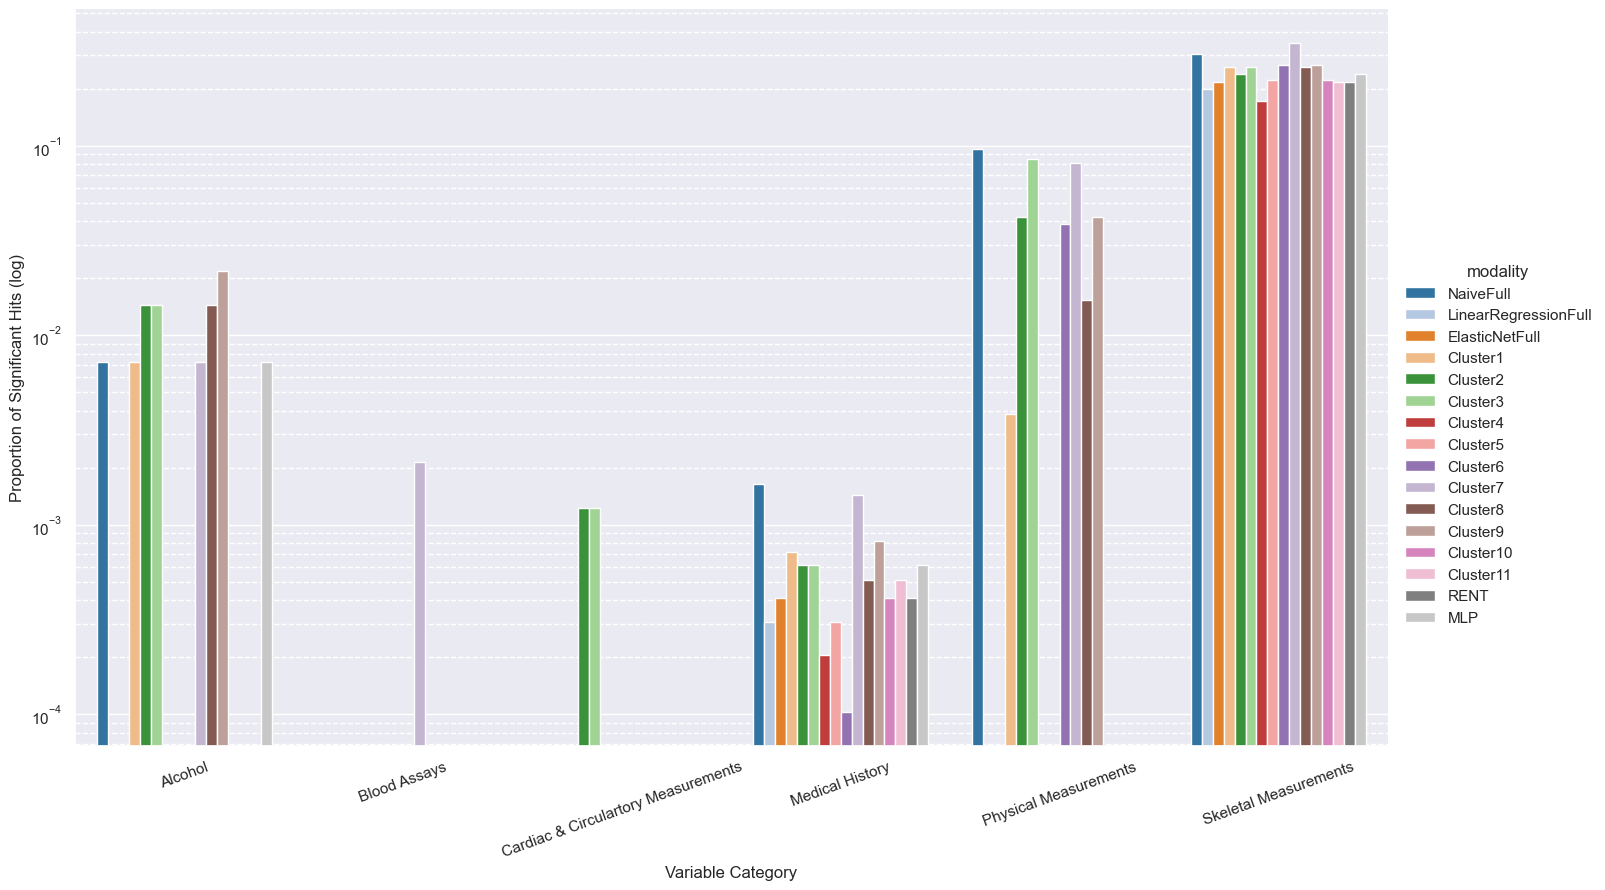

In [37]:
plt.figure(figsize=(16, 9.6))
sns.factorplot(x='var_name', y='var_hits', hue='modality', data=df_dct, kind='bar', height=8, 
               aspect=1.75, log=True, palette='tab20')
plt.xlabel('Variable Category')
plt.ylabel('Proportion of Significant Hits (log)')
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=20)

In [38]:
# df_dct2 = df_

In [39]:
vars_df

,modality,bonf,fdr,dataframe
0,NaiveFull,5.509606,3.300325,idx ...
1,LinearRegressionFull,5.509606,3.500416,idx ...
2,ElasticNetFull,5.509606,3.468050,idx ...
3,Cluster1,5.509606,3.476424,idx ...
4,Cluster2,5.509606,3.506630,idx ...
5,Cluster3,5.509606,3.327015,idx ...
6,Cluster4,5.509606,3.698217,idx ...
7,Cluster5,5.509606,3.631729,idx ...
8,Cluster6,5.509606,3.424072,idx ...
9,Cluster7,5.509606,3.276632,idx ...


In [40]:
current_mods = vars_df.modality.values
modality_names = [
    'Naive Average', 'Linear Regression', 'ElasticNet', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6',
    'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'RENT', 'MLP'
]
for idx, mod in enumerate(current_mods):
    df_dct.loc[df_dct["modality"] == mod, "modality"] = modality_names[idx]

In [41]:
df_dct.loc[df_dct['var_name'] == 'Cardiac & Circulartory Measurements', 'var_name'] = 'Card. & Circ. M.'
df_dct.loc[df_dct['var_name'] == 'Physical Measurements', 'var_name'] = 'Physical M.'
df_dct.loc[df_dct['var_name'] == 'Skeletal Measurements', 'var_name'] = 'Skeletal M.'

/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1600x960 with 0 Axes>

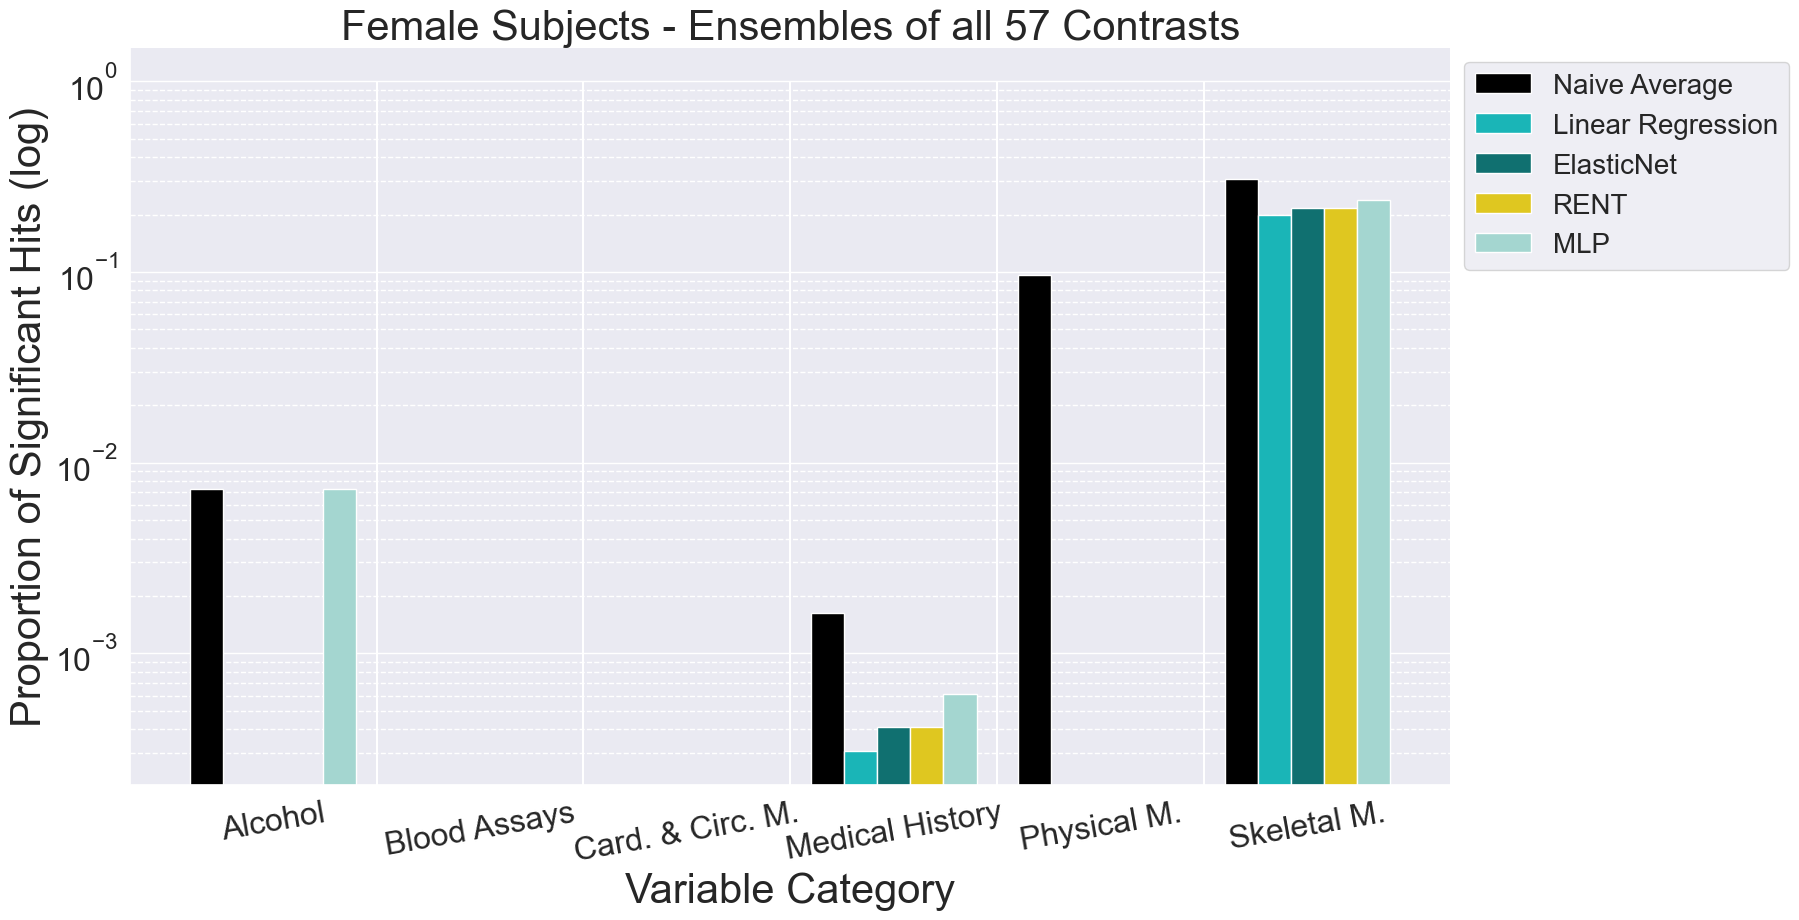

In [42]:
title_font_size=30
ticks_font_size=23
legend_font = 20
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize, facecolor='white')
# fig.patch.set_facecolor('xkcd:white')
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'Naive Average') |
                           (df_dct.modality == 'Linear Regression') |
                           (df_dct.modality == 'ElasticNet') |
                           (df_dct.modality == 'RENT') |
                           (df_dct.modality == 'MLP') 
                          
                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=10, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('Female Subjects - Ensembles of all 57 Contrasts', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5], ymin=0, ymax=1, color='white')
# plt.ylim([0, 0.05])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Female_proportion_significant_hits_ALL_modality_ensembles'+'.png', bbox_inches='tight', facecolor='white')

/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1600x960 with 0 Axes>

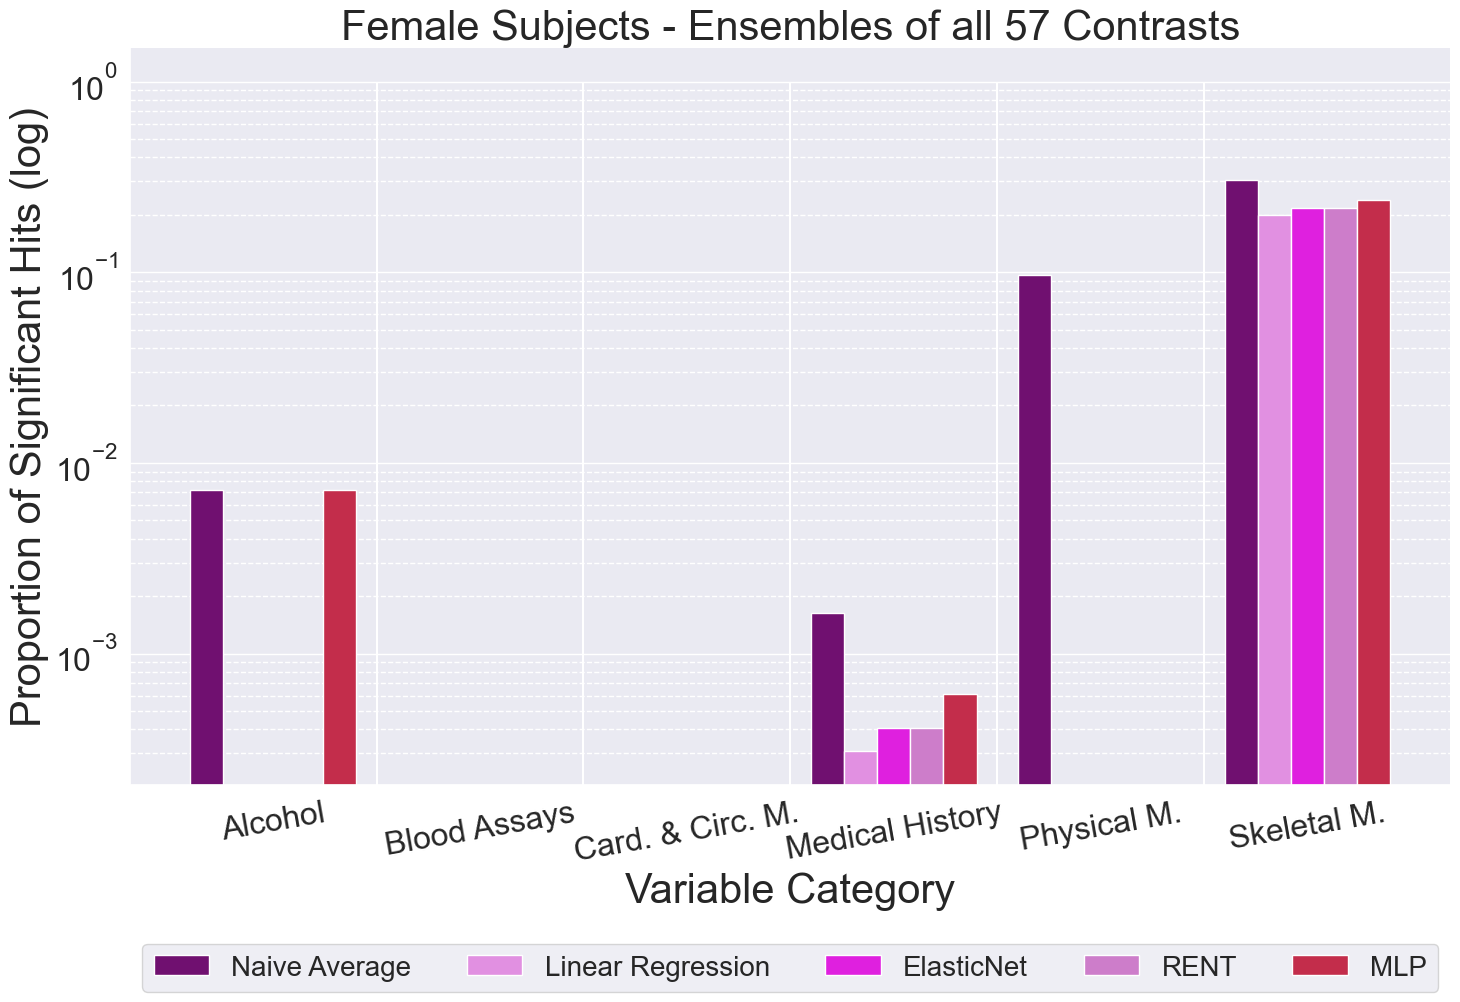

In [54]:
title_font_size=30
ticks_font_size=23
legend_font = 20
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize, facecolor='white')
# fig.patch.set_facecolor('xkcd:white')
colorCycle=['purple', 'violet','magenta','orchid','crimson',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'Naive Average') |
                           (df_dct.modality == 'Linear Regression') |
                           (df_dct.modality == 'ElasticNet') |
                           (df_dct.modality == 'RENT') |
                           (df_dct.modality == 'MLP') 
                          
                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=10, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('Female Subjects - Ensembles of all 57 Contrasts', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5], ymin=0, ymax=1, color='white')
# plt.ylim([0, 0.05])
plt.legend(fontsize=legend_font, bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol=5)
plt.savefig('Female_proportion_significant_hits_ALL_modality_ensembles'+'.png', bbox_inches='tight', facecolor='white')

/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1600x960 with 0 Axes>

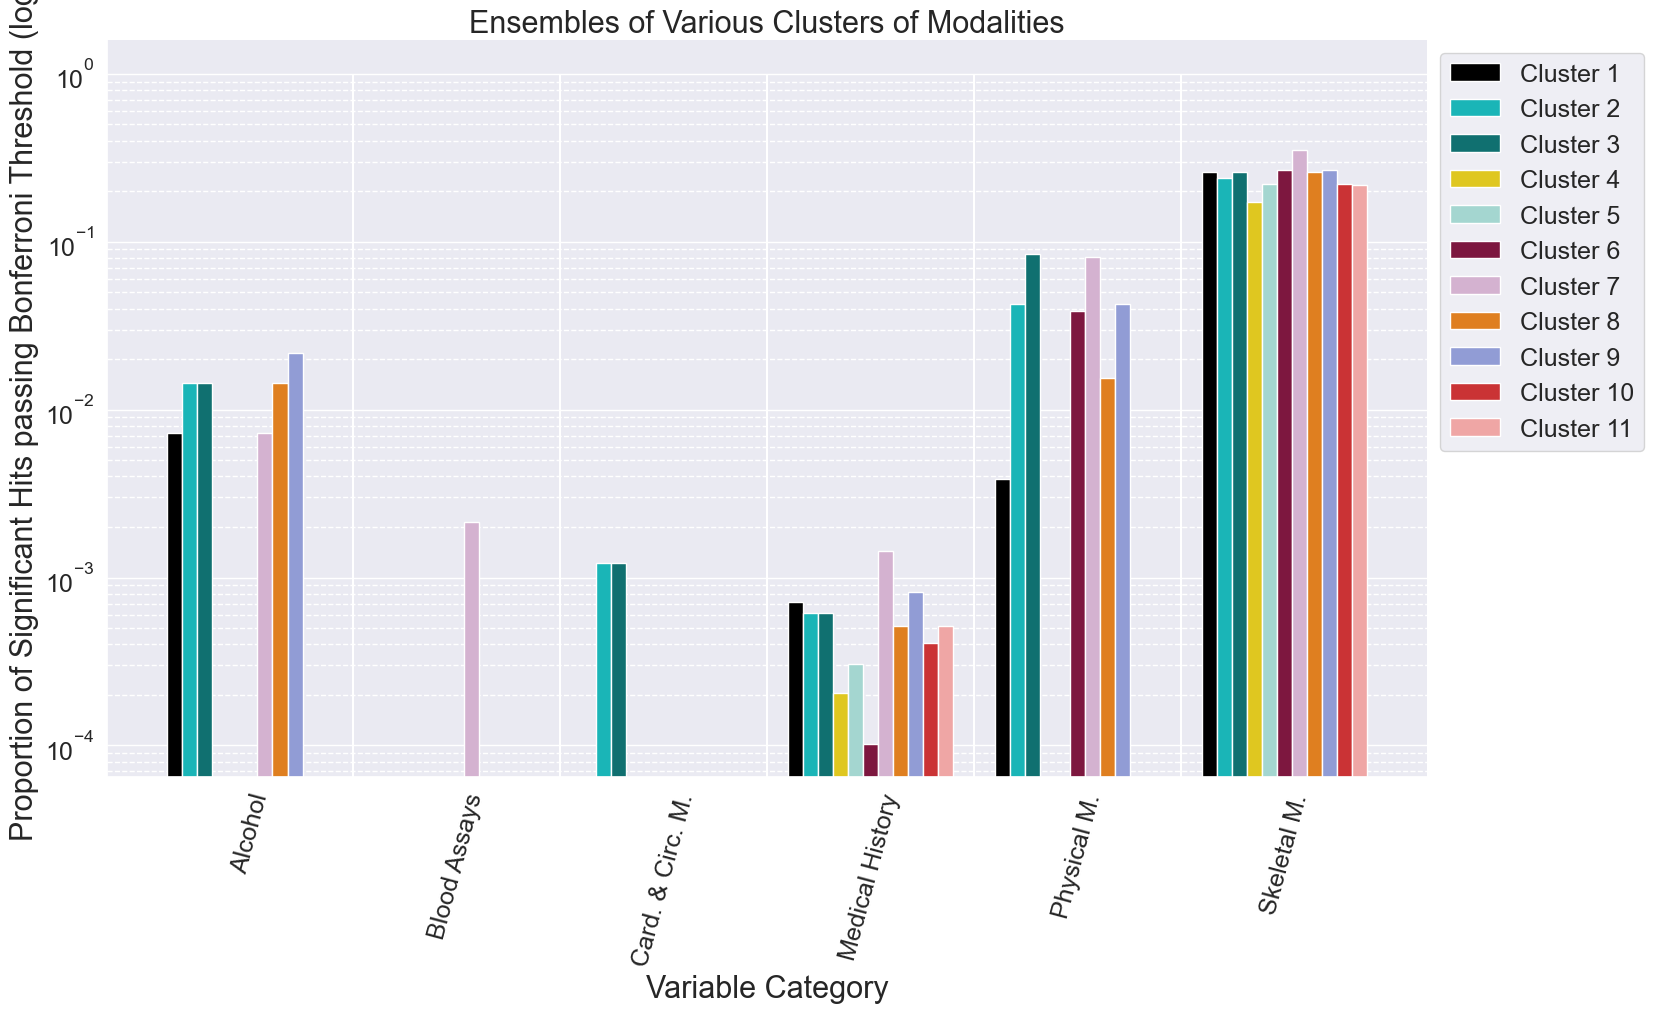

In [43]:
title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize, facecolor='white')
# fig.patch.set_facecolor('xkcd:white')
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'Cluster 1') |
                           (df_dct.modality == 'Cluster 2') |
                           (df_dct.modality == 'Cluster 3') |
                           (df_dct.modality == 'Cluster 4') |
                           (df_dct.modality == 'Cluster 5') |
                           (df_dct.modality == 'Cluster 6') |
                           (df_dct.modality == 'Cluster 7') |
                           (df_dct.modality == 'Cluster 8') |
                           (df_dct.modality == 'Cluster 9') |
                           (df_dct.modality == 'Cluster 10') |
                           (df_dct.modality == 'Cluster 11')
                          
                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits passing Bonferroni Threshold (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=75, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('Ensembles of Various Clusters of Modalities', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5], ymin=0, ymax=1, color='white')
# plt.ylim([0, 0.05])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Female_proportion_significant_hits_CLUSTERS_modality_ensembles'+'.png', bbox_inches='tight', facecolor='white')


In [43]:
vars_over_FDR_list = []

for idx in range(len(vars_df)):
    df = vars_df.iloc[idx].dataframe
    FDR = vars_df.iloc[idx].fdr
    vars_over_FDR = df[df.log_p_values>=FDR].sort_values('log_p_values', ascending=False).names.to_list()
    for var in vars_over_FDR:
        vars_over_FDR_list.append(var)
        
print("Number of unique vars across all modalities: ", len(set(vars_over_FDR_list)))

unique_vars_over_FDR = list(set(vars_over_FDR_list))

unique_vars_over_FDR_categories = []

for var in unique_vars_over_FDR:
    idx = list(varsHeader).index(var)
    category = vars_categories[idx]
    unique_vars_over_FDR_categories.append(category)
    
modalities = []
pearson_rs_list = []
for var in unique_vars_over_FDR:
    modalities_with_var = []
    pearsonRs_with_var = []
    for idx in range(len(vars_df)):
        df = vars_df.iloc[idx].dataframe
        modality = vars_df.iloc[idx].modality
        FDR = vars_df.iloc[idx].bonf
        df = df[df.log_p_values>=FDR].sort_values('log_p_values', ascending=False)
        vars_over_FDR = df.names.to_list()
        pearson_r_over_FDR = df.pearson_r.to_list()
        if var in vars_over_FDR:
            modalities_with_var.append(modality)
            pearsonRs_with_var.append(pearson_r_over_FDR[vars_over_FDR.index(var)])
    modalities.append(modalities_with_var)
    pearson_rs_list.append(pearsonRs_with_var)
    
print(len(modalities))

df_vars_over_FDR = pd.DataFrame.from_dict({
    'names': unique_vars_over_FDR,
    'Categories': unique_vars_over_FDR_categories,
    'modalities': modalities,
    'pearson_r': pearson_rs_list
})



unique_vars_categories = list(set(vars_categories))
unique_vars_counters = []
for unique_category in unique_vars_categories:
    counter = 0
    for category in vars_categories:
        if unique_category == category:
            counter += 1
    unique_vars_counters.append(counter)
categories_of_interest = list(set(df_vars_over_FDR.Categories.to_list()))
categories_of_interest.sort()

counters_of_interest = []
for cat in categories_of_interest:
    idx = unique_vars_categories.index(cat)
    counters_of_interest.append(unique_vars_counters[idx])

modalities = []
counters = []


for idx in range(len(vars_df.modality)):
    
    modality = vars_df.iloc[idx].modality

    df_of_interest = vars_df.iloc[idx].dataframe
    FDR = vars_df.iloc[idx].fdr

    counter = []

    for category in categories_of_interest:
        counter.append(len(df_of_interest[(df_of_interest.Categories==category) & (df_of_interest.log_p_values>=FDR)]))
    
    modalities.append(modality)
    counters.append(counter)
    
unique_vars_categories2, unique_vars_counters2 = zip(*sorted(zip(unique_vars_categories, unique_vars_counters)))

counters = np.array(counters)
dct = {}
dct['modality'] = modalities
for idx, cat in enumerate(categories_of_interest):
    dct[cat] = counters[:, idx] / counters_of_interest[idx]
    
df_dct = pd.DataFrame.from_dict(dct)
df_dct.replace([np.inf, -np.inf], np.nan, inplace=True)

df_dct = pd.melt(df_dct, id_vars="modality", var_name="var_name", value_name="var_hits")

Number of unique vars across all modalities:  299
299


In [44]:
current_mods = vars_df.modality.values
modality_names = [
    'Naive Average', 'Linear Regression', 'ElasticNet', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6',
    'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'RENT', 'MLP'
]
for idx, mod in enumerate(current_mods):
    df_dct.loc[df_dct["modality"] == mod, "modality"] = modality_names[idx]

/Users/andreiroibu/opt/anaconda3/envs/agemapper2/lib/python3.10/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1152x691.2 with 0 Axes>

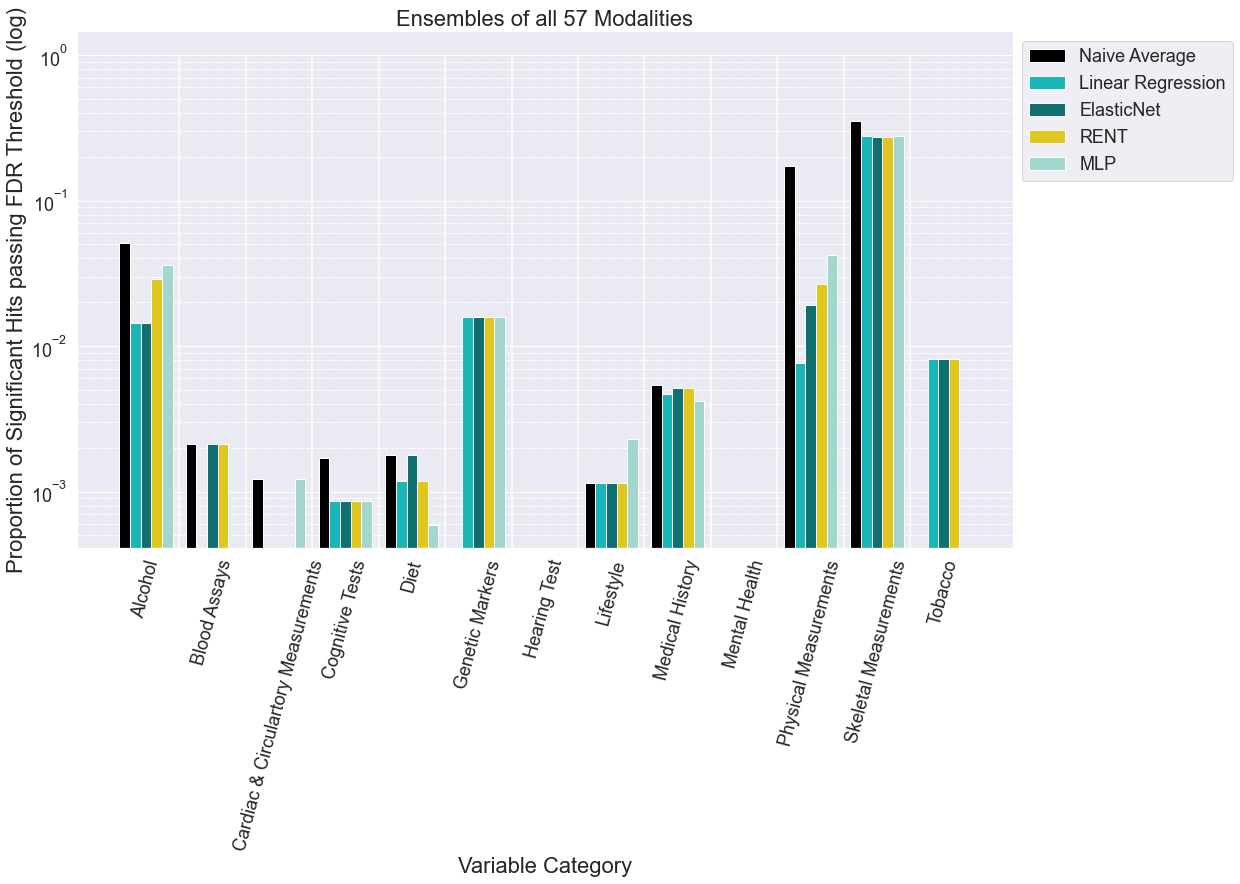

In [45]:
title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize, facecolor='white')
# fig.patch.set_facecolor('xkcd:white')
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'Naive Average') |
                           (df_dct.modality == 'Linear Regression') |
                           (df_dct.modality == 'ElasticNet') |
                           (df_dct.modality == 'RENT') |
                           (df_dct.modality == 'MLP') 
                          
                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits passing FDR Threshold (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=75, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('Ensembles of all 57 Modalities', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5], ymin=0, ymax=1, color='white')
# plt.ylim([0, 0.05])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Female_FDR_proportion_significant_hits_ALL_modality_ensembles'+'.png', bbox_inches='tight', facecolor='white')



/Users/andreiroibu/opt/anaconda3/envs/agemapper2/lib/python3.10/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1152x691.2 with 0 Axes>

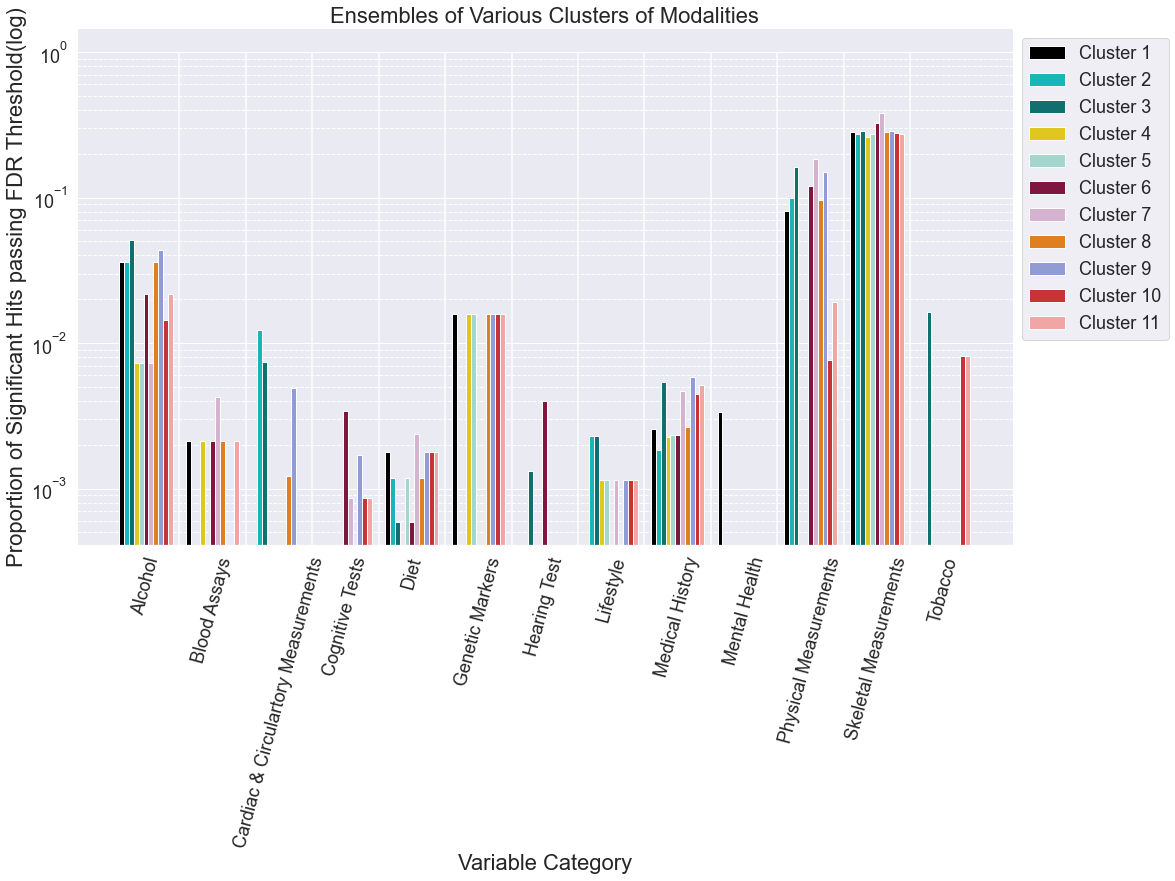

In [46]:
title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize, facecolor='white')
# fig.patch.set_facecolor('xkcd:white')
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'Cluster 1') |
                           (df_dct.modality == 'Cluster 2') |
                           (df_dct.modality == 'Cluster 3') |
                           (df_dct.modality == 'Cluster 4') |
                           (df_dct.modality == 'Cluster 5') |
                           (df_dct.modality == 'Cluster 6') |
                           (df_dct.modality == 'Cluster 7') |
                           (df_dct.modality == 'Cluster 8') |
                           (df_dct.modality == 'Cluster 9') |
                           (df_dct.modality == 'Cluster 10') |
                           (df_dct.modality == 'Cluster 11')
                          
                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits passing FDR Threshold(log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=75, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('Ensembles of Various Clusters of Modalities', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5], ymin=0, ymax=1, color='white')
# plt.ylim([0, 0.05])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Female_FDR_proportion_significant_hits_CLUSTERS_modality_ensembles'+'.png', bbox_inches='tight', facecolor='white')

